# Rain in Australia
- Predict next-day rain by training classification models on the target variable RainTomorrow.
- This dataset contains about 10 years of daily weather observations from many locations across Australia.
- RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# 1. Nan value 분석

In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
#RainTomorrow에 결측값 존재시 해당 행 제거. (Target이니까)
data = data.dropna(subset=['RainTomorrow'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

<AxesSubplot: >

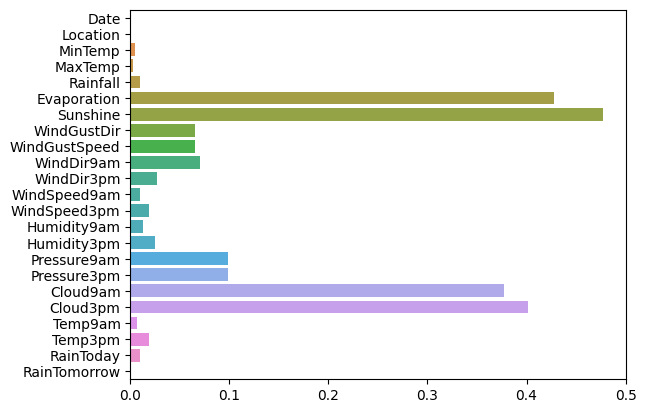

In [6]:
sns.barplot(y=data.isnull().sum().index, x=data.isnull().mean().values)

In [7]:
data['RainTomorrow'].value_counts() # 0=No,1=Yes

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [8]:
Not_rain, rain = data['RainTomorrow'].value_counts() 
total_ratio = rain / Not_rain
total_ratio

0.288960803509917

##### 1. numeric data

In [9]:
#replace nan to -1 about numeric datas
numeric_features = data.select_dtypes(include=[np.number])

#get features which have more than one NaN value 
#loc() : 인덱스를 통해 행 데이터를 가져옴.
numeric_features = numeric_features.loc[:, numeric_features.isna().sum() > 0]

nan_values = {} #set

for col in numeric_features.columns:
    if data[col].min() >= 0:
        nan_values[col] = -1
        data[col].fillna(nan_values[col], inplace = True)
    else: 
        nan_values[col] = int(data[col].min()) -1 #replace nan with new min (made) value
        data[col].fillna(nan_values[col], inplace = True)
data[numeric_features.columns].isnull().sum()       

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [10]:
nan_values

{'MinTemp': -9,
 'MaxTemp': -5,
 'Rainfall': -1,
 'Evaporation': -1,
 'Sunshine': -1,
 'WindGustSpeed': -1,
 'WindSpeed9am': -1,
 'WindSpeed3pm': -1,
 'Humidity9am': -1,
 'Humidity3pm': -1,
 'Pressure9am': -1,
 'Pressure3pm': -1,
 'Cloud9am': -1,
 'Cloud3pm': -1,
 'Temp9am': -8,
 'Temp3pm': -6}

##### 2. categorical data

In [11]:
category_features = data.select_dtypes(include=[object])
category_features = category_features.loc[:, category_features.isnull().sum() > 0]
category_features

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,W,W,WNW,No
1,WNW,NNW,WSW,No
2,WSW,W,WSW,No
3,NE,SE,E,No
4,W,ENE,NW,No
...,...,...,...,...
145454,E,ESE,E,No
145455,E,SE,ENE,No
145456,NNW,SE,N,No
145457,N,SE,WNW,No


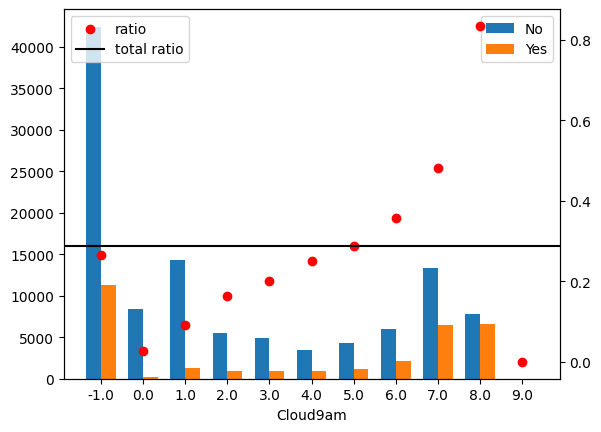

In [12]:
# data['Cloud9am'].replace(np.nan, -1, inplace=True)
# data['Cloud3pm'].replace(np.nan, -1, inplace=True)
#'Cloud9am': -1, 'Cloud3pm': -1

#print(data['Cloud9am'].unique()) = [ 8. -1.  7.  1.  0.  5.  4.  2.  6.  3.  9.]
bars = []
x = []
for i in data['Cloud9am'].unique():
    filtered_data = data[data['Cloud9am'] == i].value_counts('RainTomorrow')
    no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    bars.append([no, yes])
    x.append(i)

bars = np.array(bars)
x = np.array(x)

#plot two bars nearly 
delta = 0.35
plt.bar(x-delta, bars[:,0], delta, align='edge', label='No') #No
plt.bar(x, bars[:,1], delta, align='edge', label='Yes') #Yes

plt.xlabel('Cloud9am')
plt.legend()

plt.twinx() #x축만 공유하고 y축은 따로 사용
plt.scatter(x, bars[:, 1]/bars[:, 0], color='r', label='ratio')
plt.legend()
plt.axhline(total_ratio, color='black', label='total ratio') #수직 수평선 그리기
plt.legend()

plt.xticks(x, x)
plt.show()

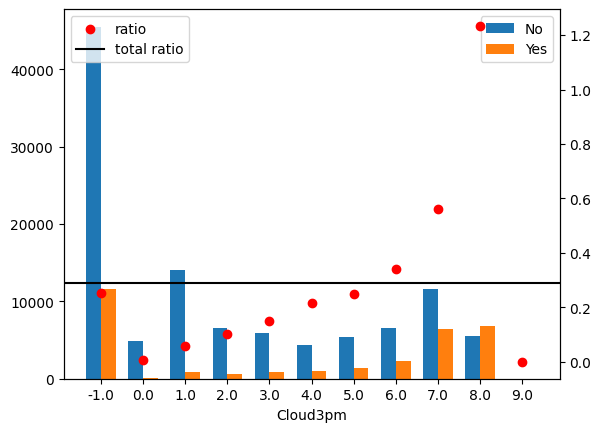

In [13]:
bars = []
x = []
for i in data['Cloud3pm'].unique():
    filtered_data = data[data['Cloud3pm'] == i].value_counts('RainTomorrow')
    no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    bars.append([no, yes])
    x.append(i)

bars = np.array(bars)
x = np.array(x)

#plot two bars nearly 
delta = 0.35
plt.bar(x-delta, bars[:,0], delta, align='edge', label='No') #No
plt.bar(x, bars[:,1], delta, align='edge', label='Yes') #Yes

plt.xlabel('Cloud3pm')
plt.legend()

plt.twinx() #x축만 공유하고 y축은 따로 사용
plt.scatter(x, bars[:, 1]/bars[:, 0], color='r', label='ratio')
plt.legend()
plt.axhline(total_ratio, color='black', label='total ratio') #수직 수평선 그리기
plt.legend()

plt.xticks(x, x)
plt.show()

- **그래프로부터 알 수 있는 사실**  
: Cloud9am이 NaN값인 경우에 대한 Yes/No ratio ≒ total ratio  
: Cloud3pm이 NaN값인 경우에 대한 Yes/No ratio ≒ total ratio

In [14]:
data['Sunshine']

0        -1.0
1        -1.0
2        -1.0
3        -1.0
4        -1.0
         ... 
145454   -1.0
145455   -1.0
145456   -1.0
145457   -1.0
145458   -1.0
Name: Sunshine, Length: 142193, dtype: float64

<AxesSubplot: xlabel='Sunshine', ylabel='Density'>

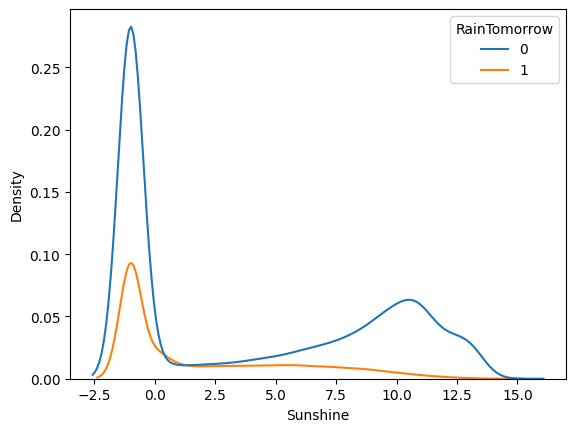

In [15]:
sns.kdeplot(data=data, x='Sunshine', hue='RainTomorrow')

<AxesSubplot: xlabel='Evaporation', ylabel='Density'>

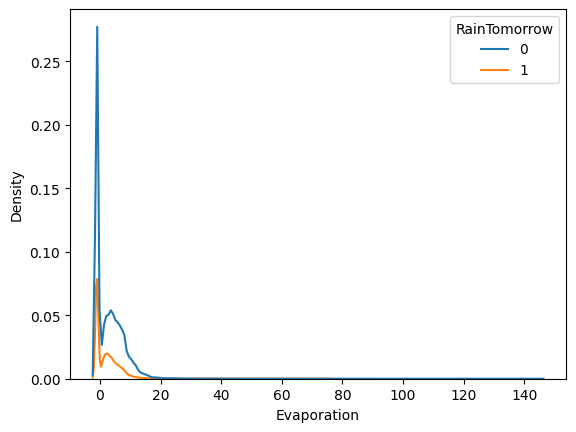

In [16]:
sns.kdeplot(data=data, x='Evaporation', hue='RainTomorrow')

# 이상치 확인 및 제거

In [17]:
data = pd.read_csv("weatherAUS.csv")
data = data.dropna(subset=['RainTomorrow'])

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

import zipfile

In [19]:
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['font.size'] = 10

<AxesSubplot: title={'center': 'WindSpeed9am'}, xlabel='RainTomorrow'>

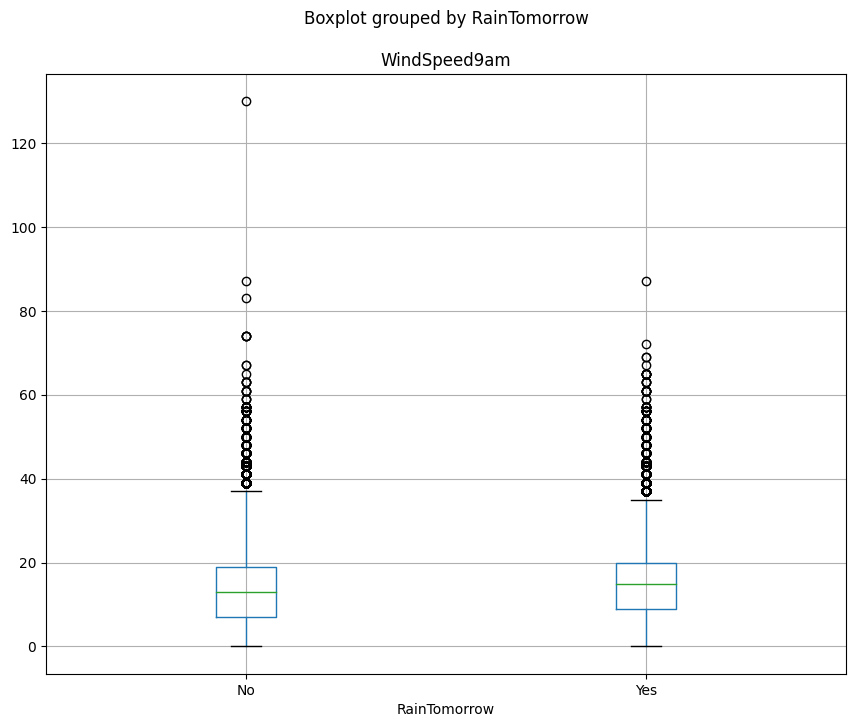

In [20]:
data.boxplot(column='WindSpeed9am', by='RainTomorrow')

In [21]:
numerical_cols = data.select_dtypes(include=np.number).columns
sigma = 4
new_data = data.copy()

for col in numerical_cols:
    less_than_sigma = max(data[col].mean() - sigma*data[col].std(), data[col].min())
    greater_than_sigma = min(data[col].mean() + sigma*data[col].std(), data[col].max())
    print(f'Col: {col}, {less_than_sigma, greater_than_sigma}')
    new_data = new_data.query(
        f'{col} > {less_than_sigma} and {col} < {greater_than_sigma}'
    )
    
else:
    print(new_data.shape)

Col: MinTemp, (-8.5, 33.9)
Col: MaxTemp, (-4.8, 48.1)
Col: Rainfall, (0.0, 36.21066574477668)
Col: Evaporation, (0.0, 22.223970251929742)
Col: Sunshine, (0.0, 14.5)
Col: WindGustSpeed, (6.0, 94.33949471952724)
Col: WindSpeed9am, (0.0, 49.575336393932005)
Col: WindSpeed3pm, (0.0, 53.85095600673932)
Col: Humidity9am, (0.0, 100.0)
Col: Humidity3pm, (0.0, 100.0)
Col: Pressure9am, (989.2318555698819, 1041.0)
Col: Pressure3pm, (987.1114964039162, 1039.6)
Col: Cloud9am, (0.0, 9.0)
Col: Cloud3pm, (0.0, 9.0)
Col: Temp9am, (-7.2, 40.2)
Col: Temp3pm, (-5.4, 46.7)
(17086, 23)


<AxesSubplot: title={'center': 'WindSpeed9am'}, xlabel='RainTomorrow'>

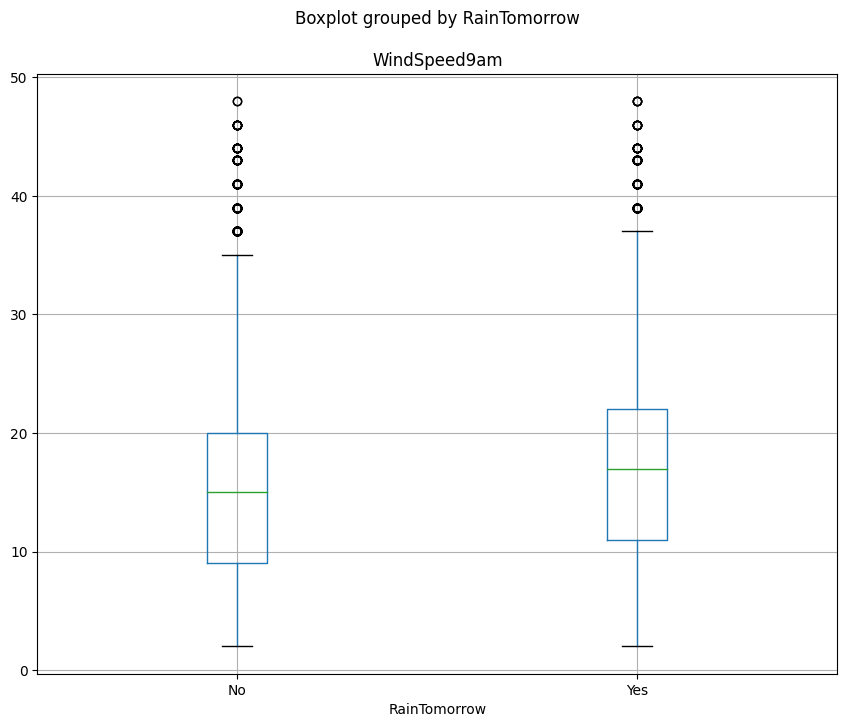

In [22]:
new_data.boxplot(column='WindSpeed9am', by='RainTomorrow')

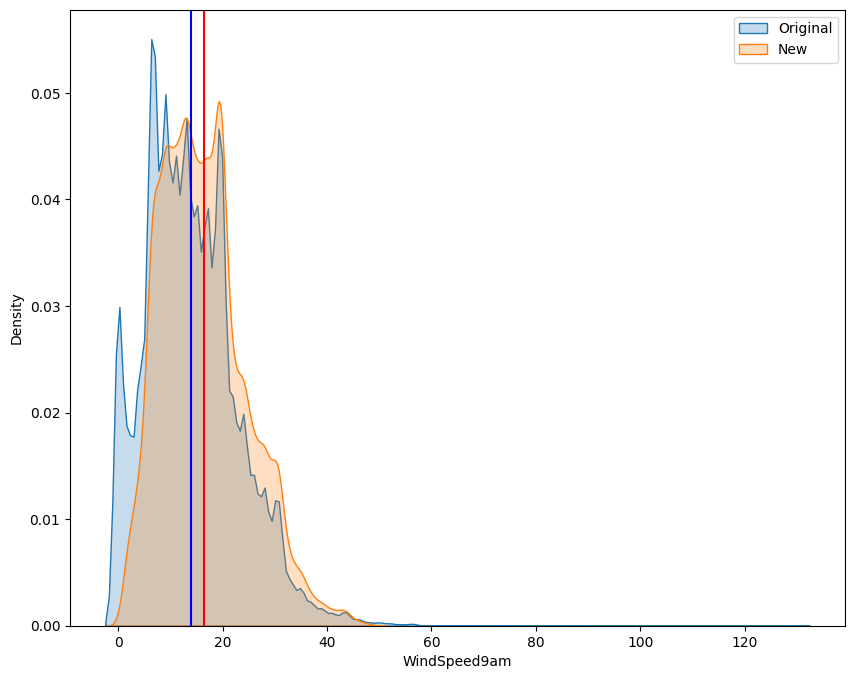

In [23]:
# Data distribution before and after removing outliers
sns.kdeplot(data['WindSpeed9am'], fill=True) #이상치 제거 전 WindSpeed9am값 밀도 분포
sns.kdeplot(new_data['WindSpeed9am'], fill=True)

plt.axvline(data['WindSpeed9am'].mean(), color='blue')
plt.axvline(new_data['WindSpeed9am'].mean(), color='r')
plt.legend(['Original', 'New'])

- 상황 해석
: (값이 큰) outlier 제거 -> 기울기의 절댓값 더 1에 가까워짐.(이전보다 우측으로 치우쳐짐)  
=> 따라서 succeed

# Feature Distribution
https://towardsdatascience.com/are-you-using-feature-distributions-to-detect-outliers-48e2ae3309

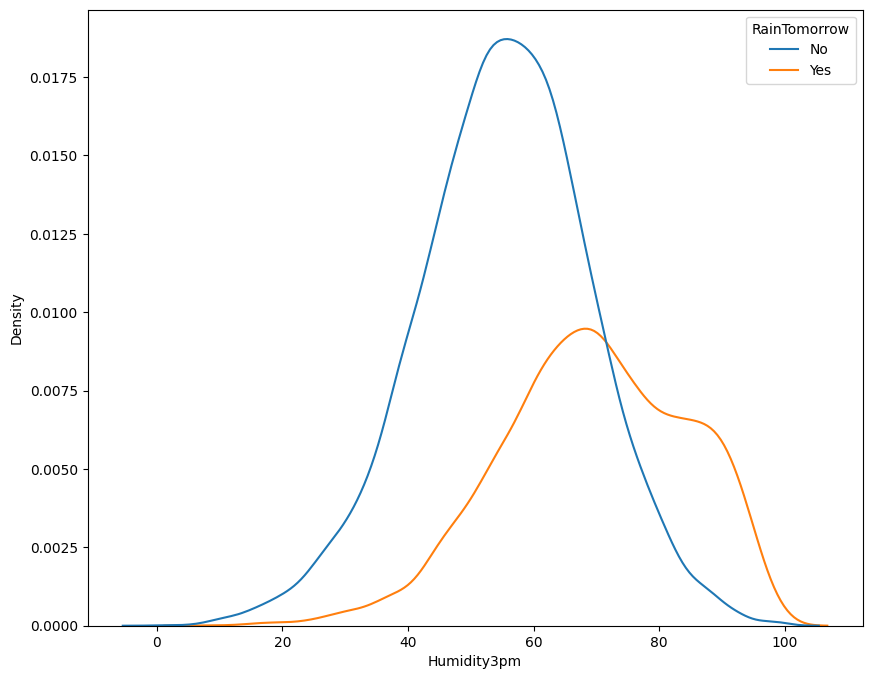

In [24]:
#1. numerical
tmp_dist = sns.kdeplot(data=new_data, x='Humidity3pm', hue='RainTomorrow')

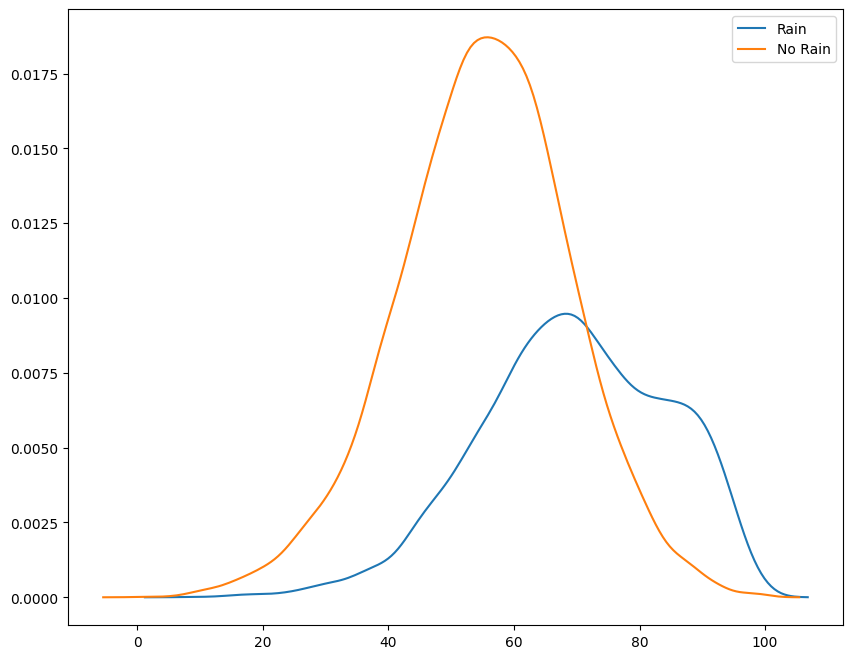

In [25]:
#tmp_dist = sns.kdeplot(data=new_data, x='Humidity3pm', hue='RainTomorrow')
line = tmp_dist.lines[0]
line2 = tmp_dist.lines[1]

x1, y1 = line.get_data() #Yes
x2, y2 = line2.get_data() #No

plt.plot(x1, y1, label='Rain')
plt.plot(x2, y2, label='No Rain')

plt.legend()

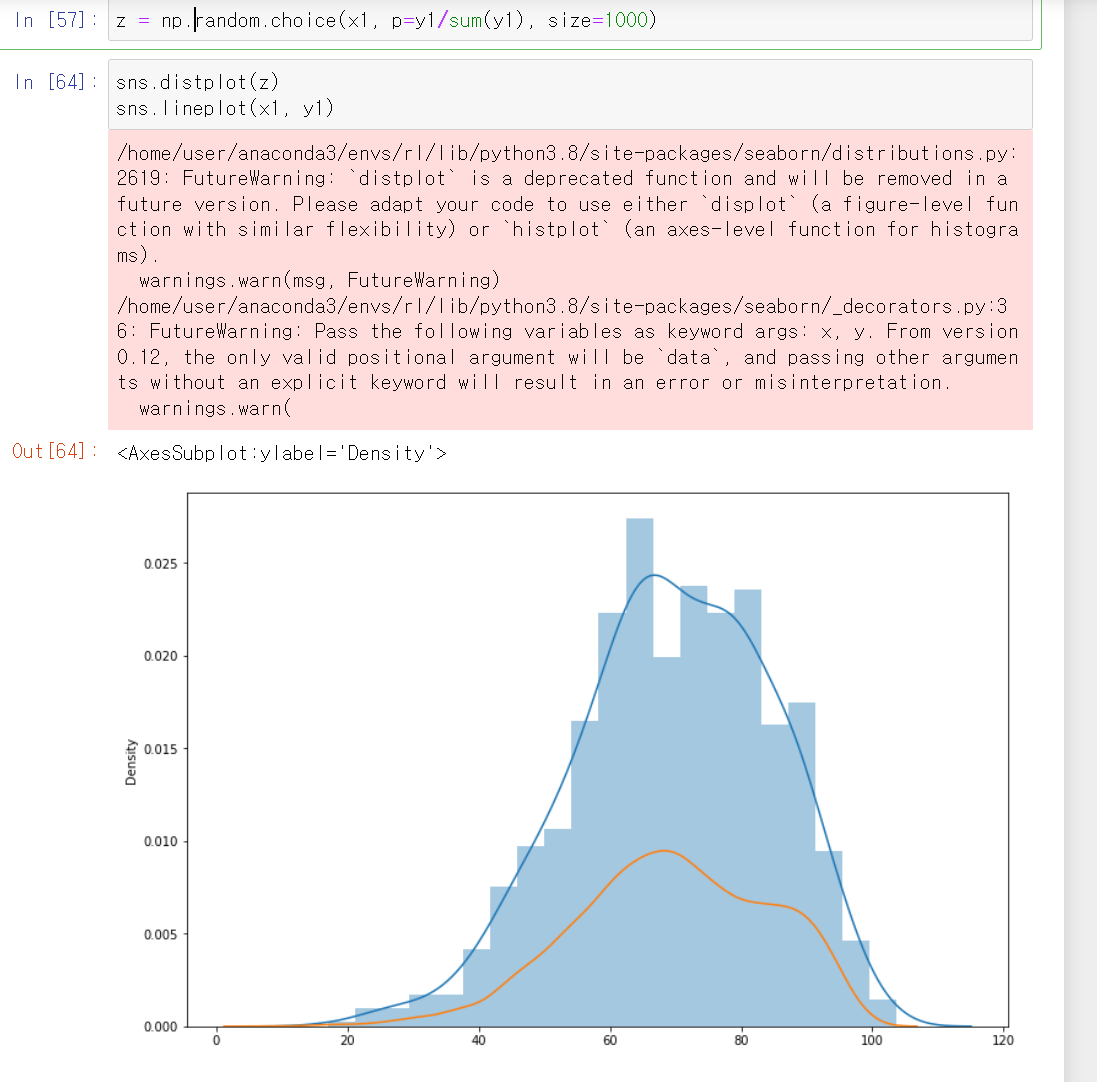

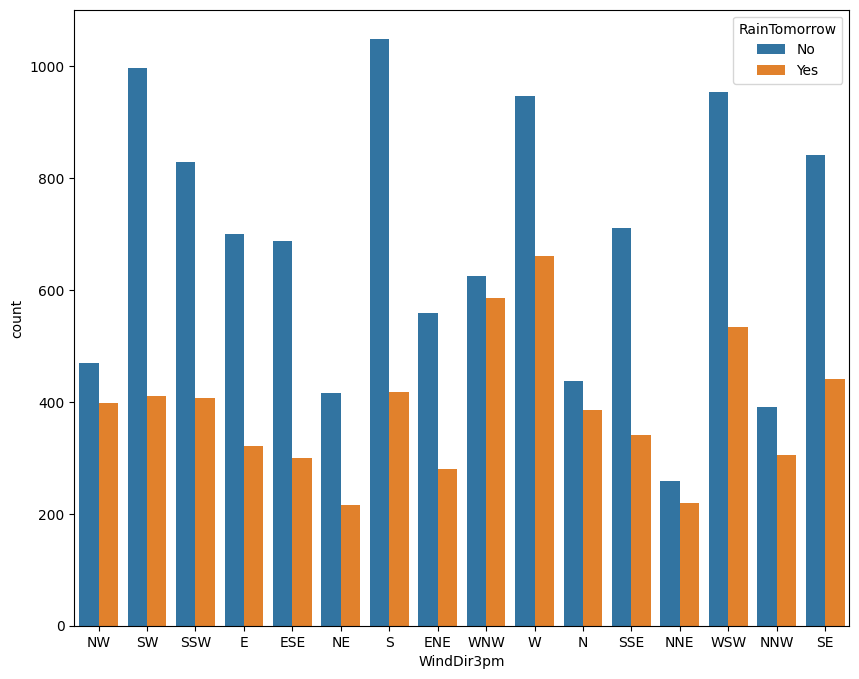

In [26]:
#2. Categorical
count = sns.countplot(data=new_data, x='WindDir3pm', hue='RainTomorrow')

In [27]:
values = count.patches
#Every bar (and its corresponding background area) is known as a patch within the bar chart object

In [28]:
keys = count.get_xticklabels()
keys

[Text(0, 0, 'NW'),
 Text(1, 0, 'SW'),
 Text(2, 0, 'SSW'),
 Text(3, 0, 'E'),
 Text(4, 0, 'ESE'),
 Text(5, 0, 'NE'),
 Text(6, 0, 'S'),
 Text(7, 0, 'ENE'),
 Text(8, 0, 'WNW'),
 Text(9, 0, 'W'),
 Text(10, 0, 'N'),
 Text(11, 0, 'SSE'),
 Text(12, 0, 'NNE'),
 Text(13, 0, 'WSW'),
 Text(14, 0, 'NNW'),
 Text(15, 0, 'SE')]

In [29]:
bars = {}
for i in range(len(keys)):
    yes_value = values[i].get_height()
    no_value = values[i + len(keys)].get_height()
    bars[keys[i].get_text()] = {0: no_value, 1: yes_value}
bars

{'NW': {0: 398.0, 1: 470.0},
 'SW': {0: 410.0, 1: 997.0},
 'SSW': {0: 406.0, 1: 829.0},
 'E': {0: 321.0, 1: 700.0},
 'ESE': {0: 299.0, 1: 687.0},
 'NE': {0: 216.0, 1: 415.0},
 'S': {0: 417.0, 1: 1048.0},
 'ENE': {0: 280.0, 1: 558.0},
 'WNW': {0: 586.0, 1: 625.0},
 'W': {0: 661.0, 1: 947.0},
 'N': {0: 386.0, 1: 437.0},
 'SSE': {0: 340.0, 1: 711.0},
 'NNE': {0: 220.0, 1: 258.0},
 'WSW': {0: 533.0, 1: 953.0},
 'NNW': {0: 305.0, 1: 391.0},
 'SE': {0: 441.0, 1: 840.0}}

In [30]:
# 0~!사이로 값을 축소 시키기 위해 ratio 도입
norm_0 = sum([bars[key][0] for key in bars.keys()])
norm_1 = sum([bars[key][1] for key in bars.keys()])
for key in bars.keys():
    bars[key][0] = bars[key][0]/norm_0
    bars[key][1] = bars[key][1]/norm_1   
bars

{'NW': {0: 0.06399742723910597, 1: 0.04325418737345849},
 'SW': {0: 0.06592699790963177, 1: 0.0917540953432726},
 'SSW': {0: 0.06528380768612317, 1: 0.0762930241119087},
 'E': {0: 0.05161601543656536, 1: 0.06442113013068286},
 'ESE': {0: 0.04807846920726805, 1: 0.06322473771397018},
 'NE': {0: 0.03473227206946455, 1: 0.038192527148904844},
 'S': {0: 0.06705258080077182, 1: 0.09644763482422235},
 'ENE': {0: 0.045023315645602184, 1: 0.05135284373274434},
 'WNW': {0: 0.09422736774401029, 1: 0.0575188661881097},
 'W': {0: 0.1062871844347966, 1: 0.08715258604822382},
 'N': {0: 0.06206785656858016, 1: 0.0402171912387263},
 'SSE': {0: 0.054671168998231226, 1: 0.06543346217559359},
 'NNE': {0: 0.03537546229297315, 1: 0.023743787962451683},
 'WSW': {0: 0.0857050972825213, 1: 0.08770476716362967},
 'NNW': {0: 0.04904325454253095, 1: 0.03598380268728143},
 'SE': {0: 0.07091172214182344, 1: 0.07730535615681944}}

# 2. impute

In [44]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17086 entries, 6068 to 142278
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17086 non-null  object 
 1   Location       17086 non-null  object 
 2   MinTemp        17086 non-null  float64
 3   MaxTemp        17086 non-null  float64
 4   Rainfall       17086 non-null  float64
 5   Evaporation    17086 non-null  float64
 6   Sunshine       17086 non-null  float64
 7   WindGustDir    17082 non-null  object 
 8   WindGustSpeed  17086 non-null  float64
 9   WindDir9am     17084 non-null  object 
 10  WindDir3pm     17085 non-null  object 
 11  WindSpeed9am   17086 non-null  float64
 12  WindSpeed3pm   17086 non-null  float64
 13  Humidity9am    17086 non-null  float64
 14  Humidity3pm    17086 non-null  float64
 15  Pressure9am    17086 non-null  float64
 16  Pressure3pm    17086 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cl

In [45]:
new_data = data.copy()

In [46]:
x, y = {}, {}
null_columns = new_data.columns[data.isnull().any()]
catetorical_cols = new_data[null_columns].select_dtypes(include='object').columns
float_cols = new_data[null_columns].select_dtypes(include=np.number).columns
int_cols = new_data.loc[:, new_data.nunique() < 150].select_dtypes(include=np.number).columns
float_cols = float_cols.drop(int_cols)

print(null_columns)
print(catetorical_cols)
print(float_cols)
print(int_cols)

def dist_categorical(data, col):
    assert col in catetorical_cols, f'{col} is not a categorical column'
    bars = sns.countplot(data=data, x=col, hue='RainTomorrow')
    keys = [key.get_text() for key in bars.get_xticklabels()]
    yes_values, no_values = bars.patches[:len(keys)], bars.patches[len(keys):]
    assert len(yes_values) == len(no_values), 'Number of yes and no values are not equal'
    
    x = {0: keys, 1: keys}
    y = {0: [v.get_height() for v in no_values], 1: [v.get_height() for v in yes_values]}
    y[0] = y[0]/sum(y[0])
    y[1] = y[1]/sum(y[1])
    plt.close()
    
    return x, y

def dist_float(data, col):
    assert col in float_cols, f'{col} is not a float column'
    kde = sns.kdeplot(data=data, x=col, hue='RainTomorrow', gridsize=1000)
    yes_line, no_line = kde.lines
    yes_x, yes_y = yes_line.get_data()
    no_x, no_y = no_line.get_data()
    
    no_y = no_y/sum(no_y)
    yes_y = yes_y/sum(yes_y)
    
    x = {0: no_x, 1: yes_x}
    y = {0: no_y, 1: yes_y}
    plt.close()
    
    return x, y

def dist_int(data, col):
    assert col in int_cols, f'{col} is not an int column'
    kde = sns.kdeplot(data=data, x=col, hue='RainTomorrow', gridsize=500)
    yes_line, no_line = kde.lines
    yes_x, yes_y = yes_line.get_data()
    no_x, no_y = no_line.get_data()
    
    yes_x = np.round(yes_x)
    no_x = np.round(no_x)
    
    new_yes_y = []
    for u in np.unique(yes_x):
        new_yes_y.append(sum(yes_y[yes_x == u]))
    
    new_no_y = []
    for u in np.unique(no_x):
        new_no_y.append(sum(no_y[no_x == u]))
    
    x = {0: np.unique(no_x), 1: np.unique(yes_x)}
    y = {0: np.array(new_no_y)/sum(new_no_y), 1: np.array(new_yes_y)/sum(new_yes_y)}
    plt.close()
    
    return x, y
        
x, y = {}, {}
for i, cols in enumerate([catetorical_cols, float_cols, int_cols]):
    dist = [dist_categorical, dist_float, dist_int][i]
    for col in cols:
        print(col)
        x[col], y[col] = dist(new_data, col)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')
Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')
WindGustDir
WindDir9am
WindDir3pm
RainToday
MinTemp
MaxTemp
Rainfall
Evaporation
Pressure9am
Pressure3pm
Temp9am
Temp3pm
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Cloud9am
Cloud3pm


In [47]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

class CustomImputer(BaseEstimator, TransformerMixin):

    def fit(self, X):
        label_col = 'RainTomorrow'
        self.X_ = X.copy()
        for col in null_columns:
            no_idx = X[(data[col].isnull()) & (X[label_col] == 'No')].index
            yes_idx = X[(data[col].isnull()) & (X[label_col] == 'Yes')].index
            
            no_impute = np.random.choice(x[col][0], size=len(no_idx), p=y[col][0])
            yes_impute = np.random.choice(x[col][1], size=len(yes_idx), p=y[col][1])
            
            self.X_.loc[no_idx, col] = no_impute
            self.X_.loc[yes_idx, col] = yes_impute
        
    def transform(self, X):
        return self.X_

In [48]:
imputer = CustomImputer()
imputer.fit(data)
filled_data = imputer.transform(data)
filled_data['Cloud9am'].value_counts()

 7.0     31072
 1.0     24554
 8.0     22643
 0.0     13834
 6.0     13180
 2.0     10657
 3.0      9437
 5.0      8931
 4.0      7219
 9.0       415
-1.0       250
 10.0        1
Name: Cloud9am, dtype: int64

# Visual Validation

MinTemp    637
MaxTemp    322
dtype: int64/142193


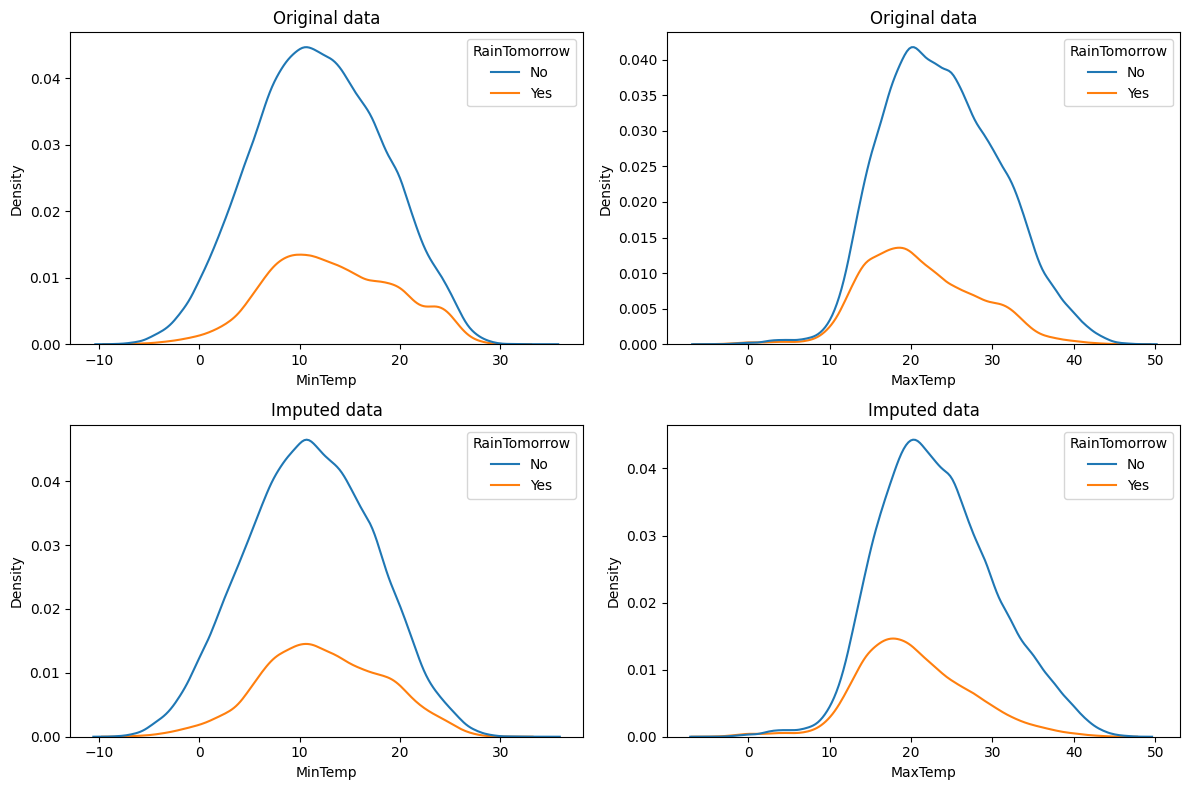

In [49]:
col = ['MinTemp', 'MaxTemp']

print(f'{data[col].isnull().sum()}/{len(filled_data)}')

fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(221), fig.add_subplot(222)

for i, ax in enumerate(axes):
    ax.set_title('Original data')
    sns.kdeplot(data=data, x=col[i], hue='RainTomorrow', ax=ax)
    
    ax = fig.add_subplot(2,2, i + 3, sharex=ax)
    ax.set_title('Imputed data')
    sns.kdeplot(data=filled_data[data.isnull().any(axis=1)], x=col[i], hue='RainTomorrow', ax=ax)
    
    plt.tight_layout()

Cloud9am    53657
Cloud3pm    57094
dtype: int64/142193


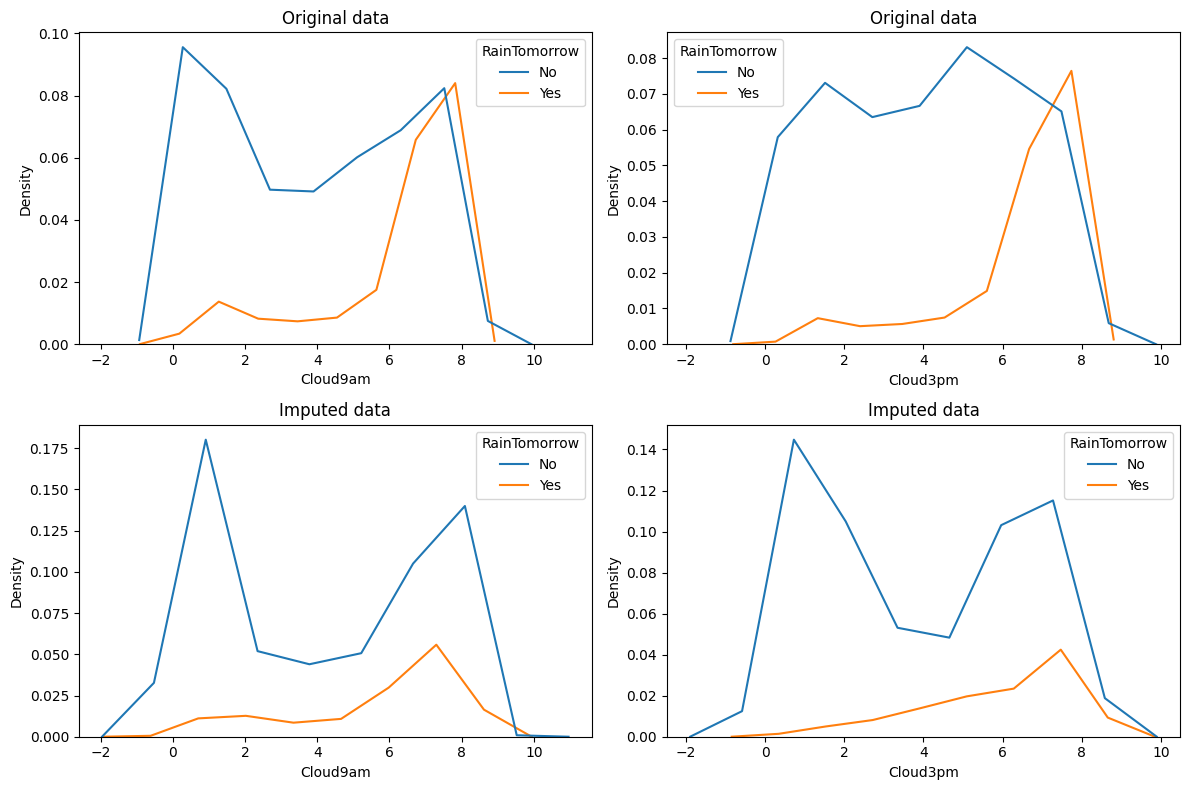

In [50]:
col = ['Cloud9am', 'Cloud3pm']

print(f'{data[col].isnull().sum()}/{len(filled_data)}')

fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(221), fig.add_subplot(222)

for i, ax in enumerate(axes):
    ax.set_title('Original data')
    sns.kdeplot(data=data, x=col[i], hue='RainTomorrow', ax=ax, gridsize=10)
    
    ax = fig.add_subplot(2,2, i + 3, sharex=ax)
    ax.set_title('Imputed data')
    sns.kdeplot(data=filled_data[data.isnull().any(axis=1)], x=col[i], hue='RainTomorrow', ax=ax, gridsize=10)
    
    plt.tight_layout()

# Preprocessing

In [51]:
#Date
catetorical_cols = filled_data.select_dtypes(include='object').columns
filled_data[catetorical_cols].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [52]:
filled_data['Date'] = pd.to_datetime(filled_data['Date'])
filled_data['Year'] = filled_data['Date'].dt.year #datetime에서 제공하는 함수/속성
filled_data['Month'] = filled_data['Date'].dt.month
filled_data['Day'] = filled_data['Date'].dt.day

In [53]:
filled_data.drop('Date',axis=1, inplace=True)
filled_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.532267,12.0,W,44.0,W,WNW,...,1007.1,8.0,1.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,7.752192,9.0,WNW,44.0,NNW,WSW,...,1007.8,8.0,2.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,7.012217,10.0,WSW,46.0,W,WSW,...,1008.7,2.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,13.671992,12.0,NE,24.0,SE,E,...,1012.8,5.0,2.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,1.536403,10.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [54]:
print(filled_data['RainTomorrow'].unique())

['No' 'Yes']


<AxesSubplot: xlabel='count', ylabel='Location'>

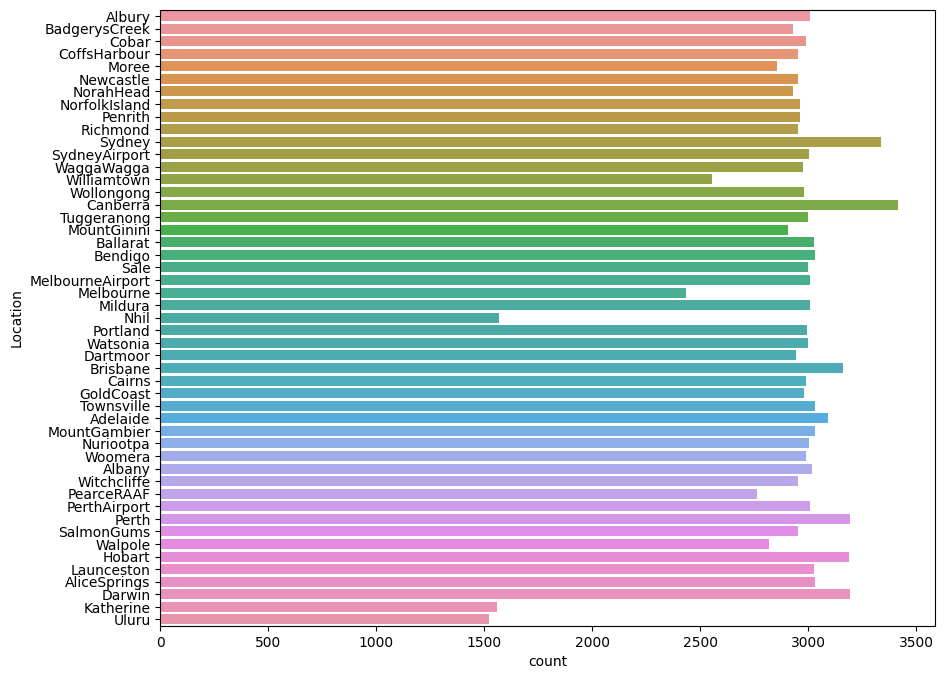

In [55]:
sns.countplot(data=filled_data, y='Location')

In [57]:
le = LabelEncoder()
filled_data['WindDir3pm'] = le.fit_transform(filled_data['WindDir3pm'])
filled_data['WindDir9am'] = le.fit_transform(filled_data['WindDir9am'])
filled_data['WindGustDir'] = le.fit_transform(filled_data['WindGustDir'])
filled_data['RainToday'] = le.fit_transform(filled_data['RainToday'])
filled_data['RainTomorrow'] = le.fit_transform(filled_data['RainTomorrow'])

<AxesSubplot: ylabel='Location'>

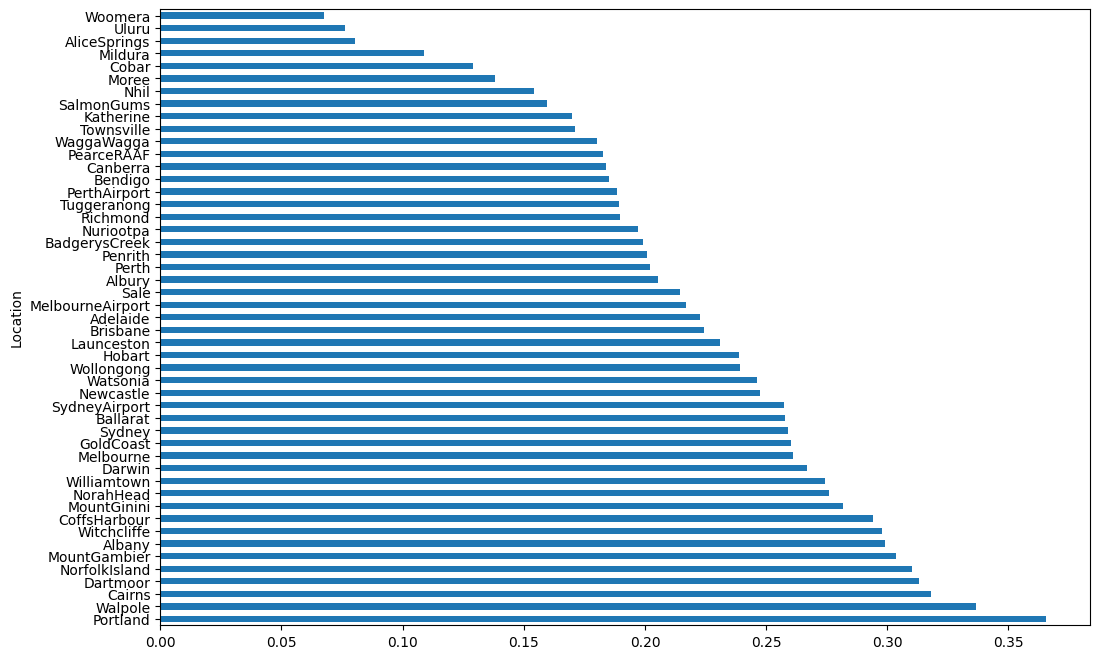

In [58]:
filled_data.groupby('Location')['RainTomorrow'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(12, 8))
#cf. barh = horizontal bar

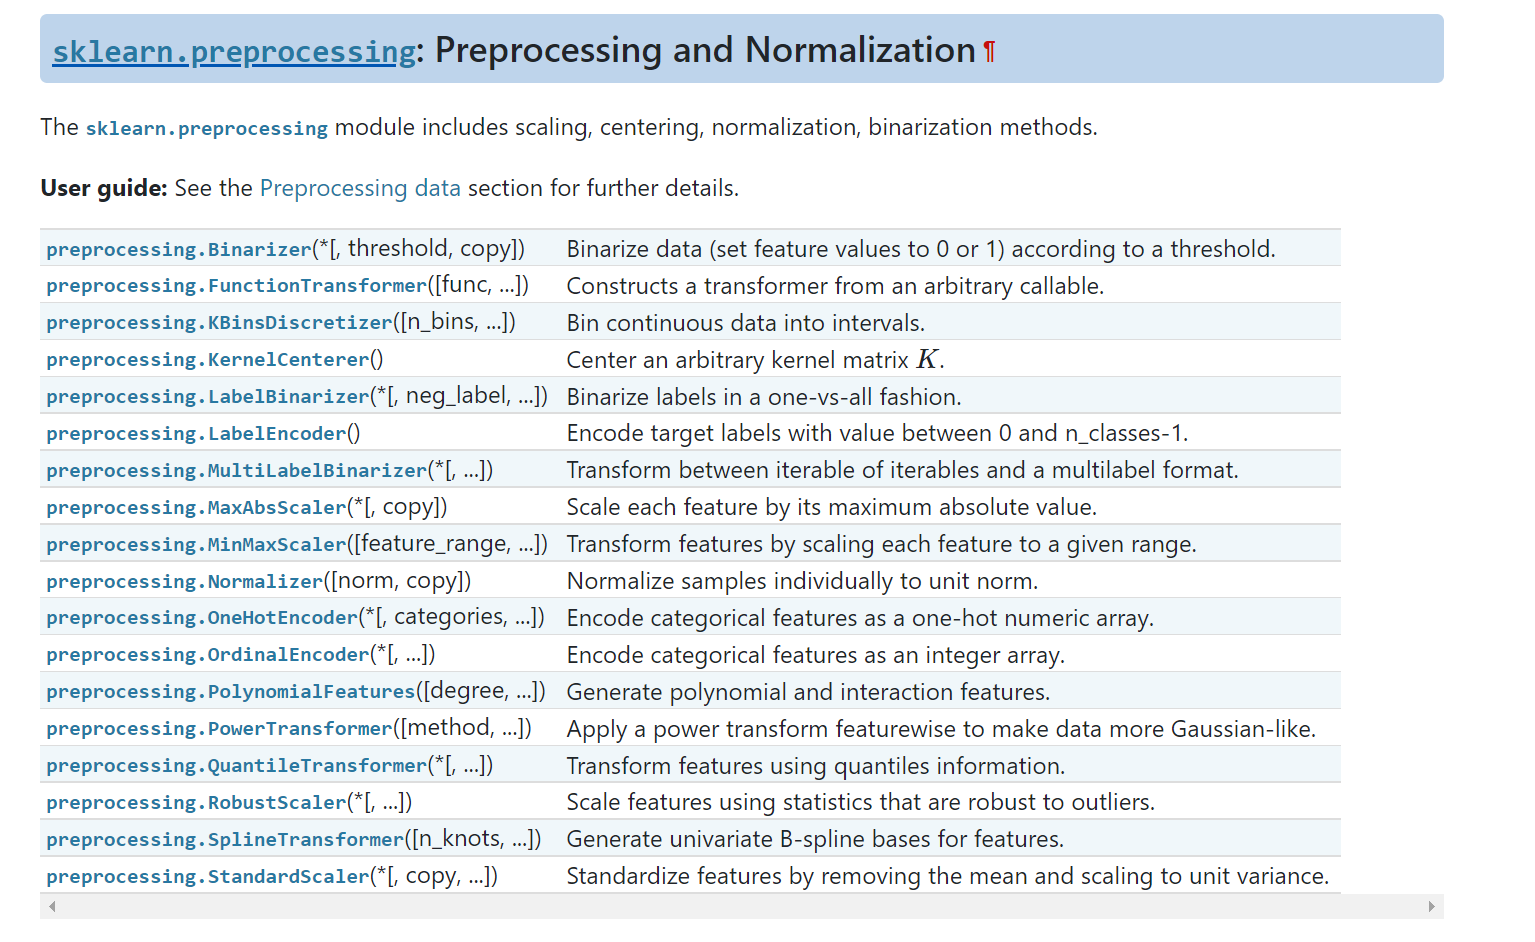

In [60]:
filled_data['Location'] = le.fit_transform(filled_data['Location'])

In [61]:
filled_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.532267,12.0,13,44.0,13,14,...,1007.1,8.0,1.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,7.752192,9.0,14,44.0,6,15,...,1007.8,8.0,2.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,7.012217,10.0,15,46.0,13,15,...,1008.7,2.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,13.671992,12.0,4,24.0,9,0,...,1012.8,5.0,2.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,1.536403,10.0,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [62]:
len(filled_data.columns)

25

In [67]:
order = ['Year', 'Month', 'Day'] 
lst = list(filled_data.columns)
order = order + lst[:-3]
order

['Year',
 'Month',
 'Day',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [70]:
filled_data = filled_data.loc[:,order]
filled_data

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,2,13.4,22.9,0.6,5.532267,12.0,13,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0
1,2008,12,2,2,7.4,25.1,0.0,7.752192,9.0,14,...,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,0,0
2,2008,12,3,2,12.9,25.7,0.0,7.012217,10.0,15,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008,12,4,2,9.2,28.0,0.0,13.671992,12.0,4,...,45.0,16.0,1017.6,1012.8,5.0,2.0,18.1,26.5,0,0
4,2008,12,5,2,17.5,32.3,1.0,1.536403,10.0,13,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017,6,20,41,3.5,21.8,0.0,1.684398,7.0,0,...,59.0,27.0,1024.7,1021.2,1.0,7.0,9.4,20.9,0,0
145455,2017,6,21,41,2.8,23.4,0.0,8.936152,11.0,0,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0,0
145456,2017,6,22,41,3.6,25.3,0.0,1.832393,8.0,6,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
145457,2017,6,23,41,5.4,26.9,0.0,4.792292,3.0,3,...,53.0,24.0,1021.0,1016.8,0.0,7.0,12.5,26.1,0,0


# Training

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = filled_data.drop('RainTomorrow', axis=1)
y = filled_data['RainTomorrow']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42,
                                                    stratify=filled_data['RainTomorrow'])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test, prediction)}')
print(classification_report(y_test, prediction))

Accuracy:0.8646576883856676
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     22064
           1       0.75      0.59      0.66      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.77      0.79     28439
weighted avg       0.86      0.86      0.86     28439

